## Protein cartography output analysis - Metadata analysis

**Notebook summary**
In this Jupyter Notebook:
- We visualize and analyse specific results from selected clusters from the ProteinCartography output of Fungal Divergent Actin (FDA) representative sequences.
- It is associated with Step 1 of the Pub approach: Expanding the initial set of fungal species that possess FDA
- We provide the codes for the Pub Figures 3C and 3E
- Generate .csv file with metadata information for FDA clusters LC04 and LC11

**Context/Goal reminder**
Fungal Divergent Actins (FDAs) have been identified through a first run of ProteinCartography using human actin as the input. From this initial search, one well defined cluster of 292 proteins stood out and mainly contained divergent actin from fungal species. Here, we have seeded a new ProteinCartography run with 6 representative sequences of the FDA cluster identified in the human-actin search. The objective of this run of ProteinCartography is to identify if we can extend this cluster and find similar FDA more broadly and obtain a more defined set of species where these FDA are found. 

**Notebook purpose**
The ProteinCartography run generated 17 clusters, among them 8 are well defined clusters. In this notebook, we first visualize the distribution of different metadata for these 8 clusters. We visulaize:
- taxonomy distribution (kingdom level) 
- protein length

--- 

### Setup path and environment

In [7]:
setwd('..')

library(ggplot2)
library(tidyverse)
library(gridExtra)
library(ggridges)

── Attaching packages ─────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘ggridges’ was built under R version 4.2.3”


### Functions definition

In [26]:
## Function 1: visualization of the distribution of protein length per cluster
prot_length=function(data_clust){
  
  dat=data_clust[,c('protid','Length','LeidenCluster')]
  
  plot=ggplot(dat, aes(y=LeidenCluster, x=Length, fill=LeidenCluster))+
    geom_density_ridges() + theme_light()
  
  plot
  
}



## Function 2: visualization of the kingdoms distribution  per cluster
 # in the data, taxonomy information is provided as a string - the overall strategy to get the kingdom information is to split that string into a vector of character and that grep the kingdom information
 # The first for loop enables to obtain the kingdom information for each species
 # Thes second for loop reformat the data to plot them as a stacked barplot

taxo_rep=function(data_clust){
  dat=data_clust[,c('protid','LeidenCluster','Taxonomic.lineage')]
  
  dat$Kingdom='Fungi' # initiates the Kingdom column with default value as Fungi
  
  for (i in 1:dim(dat)[1]){
    line=dat[i,3]
    vec_lin=c(strsplit(line, ",")[[1]])
    
    loc_king=grep('(kingdom)',vec_lin,fixed=TRUE)
    
    king_inf=vec_lin[loc_king]
    
    if (length(loc_king)>=1){
      vec_kin=c(strsplit(king_inf, " ")[[1]])
      
      kingdom=vec_kin[2]
      
      dat[i,4]=kingdom
    }
    
    if (length(loc_king)==0){       # some species may not have kingdom information
      dat[i,4]='other_taxon'
    }

    dat_plot_taxo=data.frame()
    clust_list=c(unique(dat$LeidenCluster))
  }
    
    for(i in 1:length(clust_list)){
      dat_cl=subset(dat, dat$LeidenCluster==clust_list[i])
      taxo_table=as.data.frame(t(table(dat_cl$Kingdom)))
      
      colnames(taxo_table)=c('LeidenCluster','Kingdom','Count')
      taxo_table$LeidenCluster=clust_list[i]
      
      dat_plot_taxo=rbind(dat_plot_taxo, taxo_table)
    }

  plot=ggplot(data=dat_plot_taxo, aes(x=LeidenCluster, y=Count, fill=Kingdom)) +
    geom_bar(stat="identity") + theme_light()
    
  
}


### Analysis

In [23]:
## Data import
data_PC=read.csv('data/step1/Protein_Cartography_umap_output.csv')

In [24]:
## Selection of 8 clusters of interest

data_8C=subset(data_PC,data_PC$LeidenCluster%in%c('LC01','LC03','LC04','LC10','LC12','LC11','LC14','LC15'))

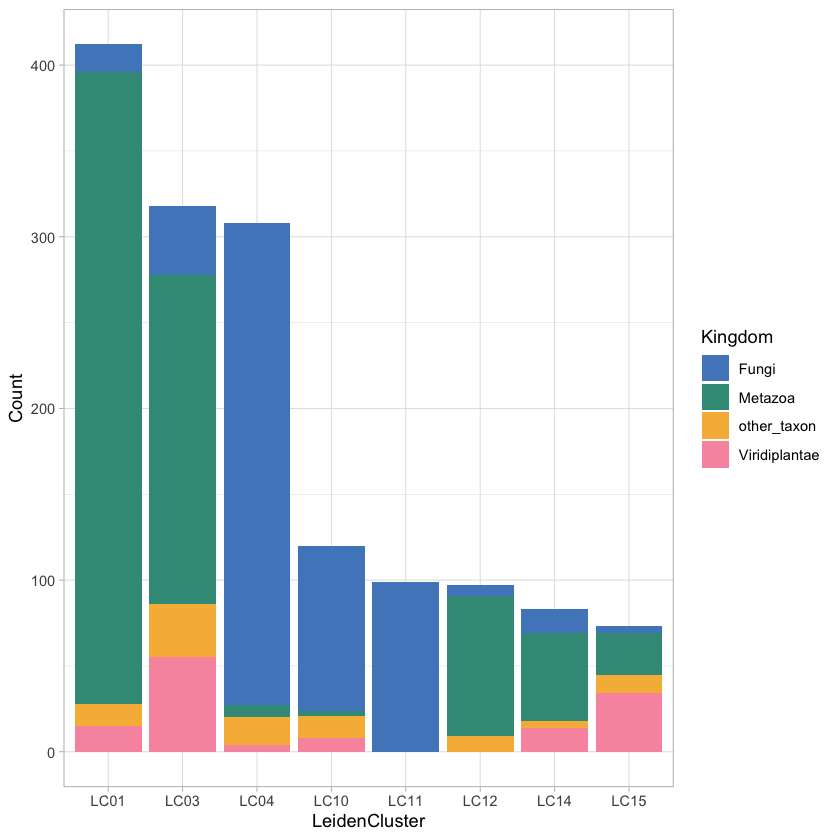

In [27]:
## Kingdom distribution (Figure 3C)

taxo_plot=taxo_rep(data_8C)
taxo_plot + theme_light() + scale_fill_manual(values=c('#5088C5','#3B9886',
                                                        '#F7B846','#F898AE'))

Picking joint bandwidth of 10.6

Warning message:
“Removed 1 rows containing non-finite values (stat_density_ridges).”


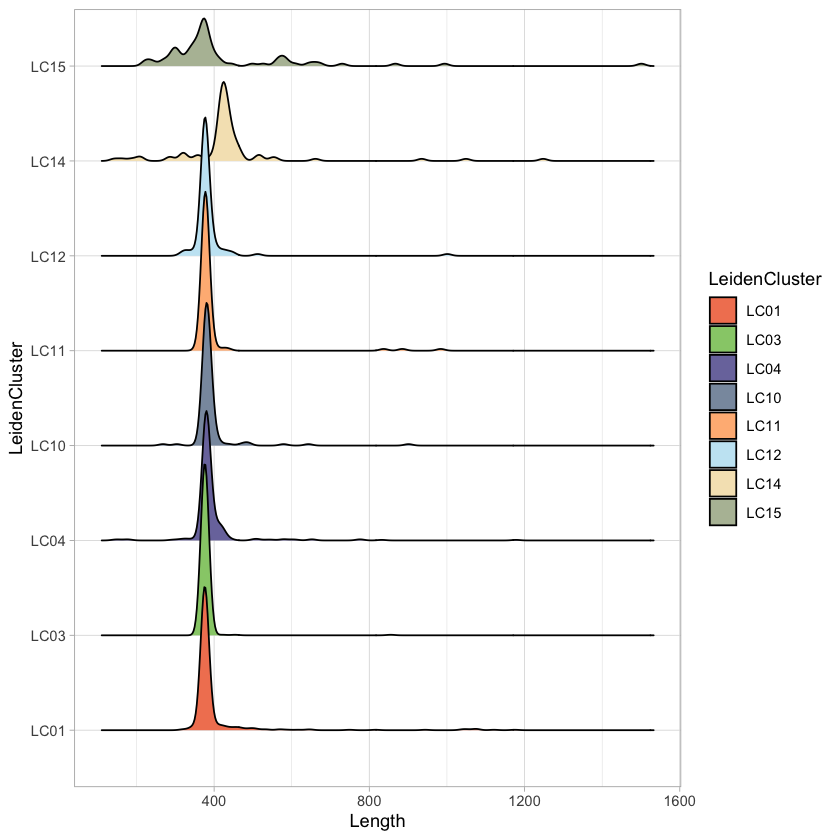

In [28]:
## Protein length distribution  (Figure 1E)
prot_length_plot=prot_length(data_8C)

prot_length_plot + theme_light()+
    scale_fill_manual(values=c('#F28360','#97CD78','#7A77AB',
                               '#8A99AD','#FFB984','#C6E7F4',
                               '#F5E4BE','#B5BEA4'))


### Subset and export of information for clusters containing FDA (LC04 and LC11)

In [30]:
## Extraction of LC04 and LC11 

data_goodC=subset(data_8C, data_8C$LeidenCluster%in%c('LC04','LC11'))

head(data_goodC,10)

,protid,UMAP1,UMAP2,StruCluster,Entry,Entry.Name,Protein.names,Gene.Names..primary.,Annotation,Organism,⋯,source.method,A0A401L4A6.hit,A0A0C9N219.hit,A0A2N1JBK3.hit,A0A5B0SCN5.hit,A0A226D8X1.hit,A0A7J6TT41.hit,pdb_origin,pdb_confidence,pdb_chains
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<chr>
2,A0A015ICG5,8.100070,10.419428,SC05,A0A015ICG5,A0A015ICG5_RHIIW,Actin,,1,Rhizophagus irregularis (strain DAOM 197198w) (Glomus intraradices),⋯,blast,0,0,0,0,0,1,AlphaFold,87.16744,['A']
10,A0A060SBE2,9.555463,10.236008,SC05,A0A060SBE2,A0A060SBE2_PYCCI,Actin-2,,1,Pycnoporus cinnabarinus (Cinnabar-red polypore) (Trametes cinnabarina),⋯,blast,0,1,1,1,0,1,AlphaFold,90.83092,['A']
25,A0A061HA90,7.684431,10.729848,SC05,A0A061HA90,A0A061HA90_9BASI,Actin-2,,1,Pseudozyma flocculosa PF-1,⋯,blast,0,1,1,1,0,1,AlphaFold,91.11313,['A']
30,A0A066VBJ4,6.895618,9.891287,SC05,A0A066VBJ4,A0A066VBJ4_TILAU,Putative centractin,,1,Tilletiaria anomala (strain ATCC 24038 / CBS 436.72 / UBC 951),⋯,blast,0,1,1,1,0,0,AlphaFold,88.88857,['A']
32,A0A067LYG7,9.215788,10.496707,SC05,A0A067LYG7,A0A067LYG7_9AGAM,Actin-2,,1,Botryobasidium botryosum FD-172 SS1,⋯,blast,0,1,1,1,0,1,AlphaFold,89.26962,['A']
35,A0A067QC48,8.936422,10.788609,SC05,A0A067QC48,A0A067QC48_9AGAM,Actin-2,,1,Jaapia argillacea MUCL 33604,⋯,blast,0,1,1,1,0,1,AlphaFold,90.88222,['A']
36,A0A067TP80,9.887537,10.393695,SC05,A0A067TP80,A0A067TP80_GALM3,Actin-2,,1,Galerina marginata (strain CBS 339.88),⋯,blast,0,1,1,1,0,1,AlphaFold,89.43336,['A']
41,A0A072PQI0,6.579991,10.245931,SC05,A0A072PQI0,A0A072PQI0_9EURO,Actin-like protein,,1,Exophiala aquamarina CBS 119918,⋯,blast,1,0,0,1,0,0,AlphaFold,88.61764,['A']
42,A0A074RRT4,10.009625,10.789115,SC05,A0A074RRT4,A0A074RRT4_9AGAM,Putative actin II (Centractin-like protein),,1,Rhizoctonia solani 123E,⋯,blast,0,1,1,1,0,1,AlphaFold,88.71037,['A']


In [32]:
write.csv(data_goodC,'results/step1/Protein_Cartography_output_FDAclusters.csv')

In [33]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/manonmorin/miniconda3/envs/R_analysis_env/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggridges_0.5.4  gridExtra_2.3   forcats_0.5.2   stringr_1.5.0  
 [5] dplyr_1.0.10    purrr_0.3.5     readr_2.1.3     tidyr_1.2.1    
 [9] tibble_3.1.8    tidyverse_1.3.2 ggplot2_3.3.6  

loaded via a namespace (and not attached):
 [1] lubridate_1.8.0     assertthat_0.2.1    digest_0.6.30      
 [4] utf8_1.2.2          IRdisplay_1.1       R6_2.5.1           
 [7] cellranger_1.1.0    repr_1.1.4          backports_1.4.1    
[10] reprex_2.0.2        evaluate_0.17       httr_1.4.4         
[13] pillar_1.8.1        rlang_1.0.6         googlesheets4_1.0.1
[16] uui